<a href="https://colab.research.google.com/github/yestabshir/Data-B2B/blob/Dash_Tableau_Sales/POS_of_12_October_Herlev_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import smtplib
from email.mime.text import MIMEText
import matplotlib.pyplot as plt
import seaborn as sns

**Load Files** from Drive

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Pos_Data.csv to Pos_Data (2).csv


In [27]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Pos_Data (2).csv']))

**Show the content** of the data


In [28]:
print(df2)

    transaction_id  store_id product_id product_name  quantity  \
0          10001.0       1.0       P101      T-shirt       2.0   
1          10002.0       1.0       P102        Jeans       1.0   
2          10003.0       2.0       P103     Sneakers       1.0   
3          10004.0       3.0       P104       Jacket       1.0   
4          10005.0       2.0       P105          Hat       3.0   
5          10006.0       3.0       P101      T-shirt       1.0   
6          10007.0       1.0       P106   Sunglasses       1.0   
7          10008.0       1.0       P103     Sneakers       2.0   
8          10009.0       3.0       P107     Backpack       1.0   
9          10010.0       2.0       P108        Watch       1.0   
10             NaN       NaN        NaN          NaN       NaN   
11             NaN       NaN        NaN          NaN       NaN   
12             NaN       NaN        NaN          NaN       NaN   
13             NaN       NaN        NaN          NaN       NaN   

    price

In [30]:
df2.head(10)

,transaction_id,store_id,product_id,product_name,quantity,price_per_unit,total_amount,payment_method,transaction_date,customer_id
0,10001.0,1.0,P101,T-shirt,2.0,15.0,30.0,Credit Card,10/10/2024 14:25,C102
1,10002.0,1.0,P102,Jeans,1.0,45.0,45.0,Cash,10/10/2024 15:10,C105
2,10003.0,2.0,P103,Sneakers,1.0,60.0,60.0,Debit Card,11/10/2024 11:20,C109
3,10004.0,3.0,P104,Jacket,1.0,100.0,100.0,Credit Card,11/10/2024 12:00,C110
4,10005.0,2.0,P105,Hat,3.0,12.0,36.0,Cash,11/10/2024 13:15,C115
5,10006.0,3.0,P101,T-shirt,1.0,15.0,15.0,Credit Card,12/10/2024 09:45,C112
6,10007.0,1.0,P106,Sunglasses,1.0,25.0,25.0,Debit Card,12/10/2024 10:30,C113
7,10008.0,1.0,P103,Sneakers,2.0,60.0,120.0,Cash,12/10/2024 11:00,C108
8,10009.0,3.0,P107,Backpack,1.0,35.0,35.0,Credit Card,12/10/2024 13:00,C107
9,10010.0,2.0,P108,Watch,1.0,75.0,75.0,Debit Card,12/10/2024 14:00,C111


In [ ]:
# prompt: Using dataframe df2: visualize anomaly

import matplotlib.pyplot as plt

# Assuming 'anomaly_score' represents the anomaly detection score
# and 'anomaly' indicates whether a transaction is an anomaly (1) or not (-1)

# Create a scatter plot to visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.scatter(df2.index, df2['anomaly_score'], c=df2['anomaly'], cmap='coolwarm')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.title('Visualization of Anomaly Detection')
plt.colorbar(label='Anomaly (1: Yes, -1: No)')
plt.show()


**Transformation** of the text such as missing values, replace with mean, refill missing values with value, dropping duplicates and row with no values

In [31]:
# Check for missing values
print(df2.isnull().sum())

transaction_id      4
store_id            4
product_id          4
product_name        4
quantity            4
price_per_unit      4
total_amount        4
payment_method      4
transaction_date    4
customer_id         4
dtype: int64


In [32]:
# Option 1: Remove rows with missing values
df2.dropna(inplace=True)

In [33]:
# Option 2: Fill missing values with mean/median/mode
# For numerical columns, fill with mean
df2['total_amount'].fillna(df2['total_amount'].mean(), inplace=True)

<ipython-input-33-6d825e0250e3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_amount'].fillna(df2['total_amount'].mean(), inplace=True)


In [35]:
# Option 3: Fill missing values with a specific value
df2['total_amount'].fillna(0, inplace=True)

<ipython-input-35-9f81759e1e2e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['total_amount'].fillna(0, inplace=True)


Show  the updated data **after cleaning**

In [36]:
# Print the updated dataframe
print(df2)

   transaction_id  store_id product_id product_name  quantity  price_per_unit  \
0         10001.0       1.0       P101      T-shirt       2.0            15.0   
1         10002.0       1.0       P102        Jeans       1.0            45.0   
2         10003.0       2.0       P103     Sneakers       1.0            60.0   
3         10004.0       3.0       P104       Jacket       1.0           100.0   
4         10005.0       2.0       P105          Hat       3.0            12.0   
5         10006.0       3.0       P101      T-shirt       1.0            15.0   
6         10007.0       1.0       P106   Sunglasses       1.0            25.0   
7         10008.0       1.0       P103     Sneakers       2.0            60.0   
8         10009.0       3.0       P107     Backpack       1.0            35.0   
9         10010.0       2.0       P108        Watch       1.0            75.0   

   total_amount payment_method  transaction_date customer_id  
0          30.0    Credit Card  10/10/2024 14

**Data Visualize**

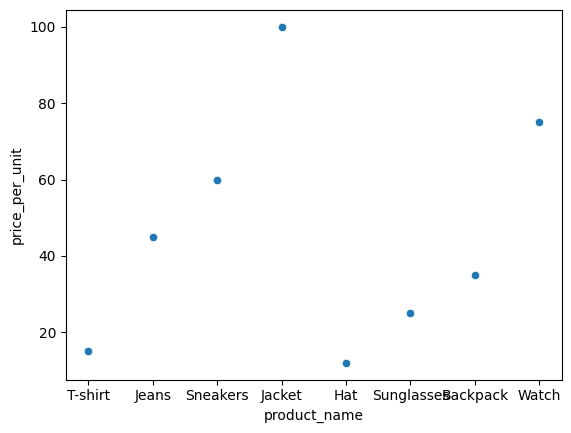

In [38]:
# Create a scatter plot of Product name vs. price per unit
sns.scatterplot(x='product_name', y='price_per_unit', data=df2)
plt.show()

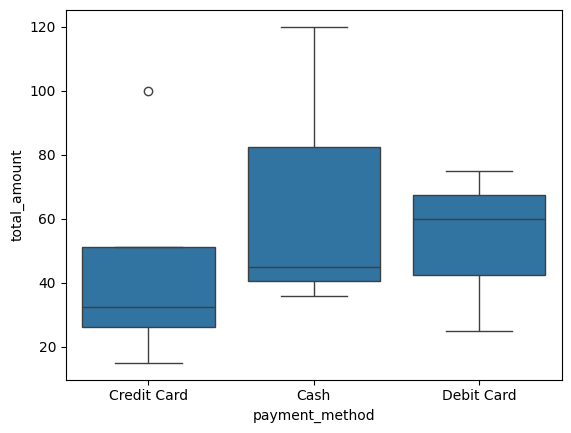

In [42]:
# Create a box plot of total amount by payment method
sns.boxplot(x='payment_method', y='total_amount', data=df2)
plt.show()

In [45]:
import plotly.express as px

# Create a bar chart using Plotly Express
fig = px.bar(df2, x='product_name', y='price_per_unit')

In [46]:
# Show the chart
fig.show()

In [47]:
# Example 1: Improved Bar Chart with Plotly
fig = px.bar(df2, x='product_name', y='total_amount',
             title='Total Amount per Product',
             labels={'product_name': 'Product Name', 'total_amount': 'Total Amount'},
             color='payment_method')  # Add color based on payment method
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability
fig.show()

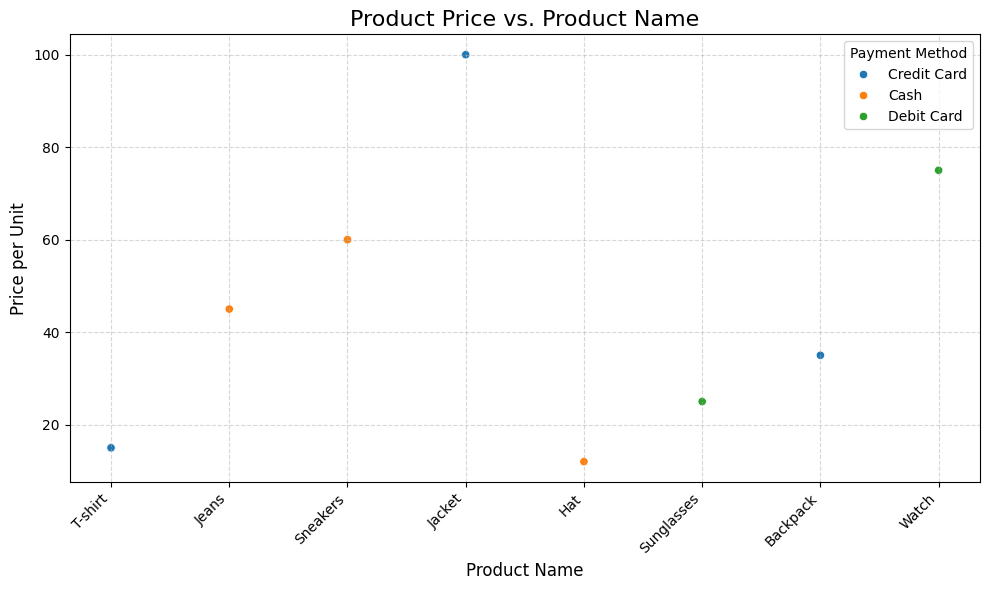

In [48]:
# Example 2: Enhanced Scatter Plot with Seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size
sns.scatterplot(x='product_name', y='price_per_unit', data=df2, hue='payment_method')
plt.title('Product Price vs. Product Name', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Price per Unit', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.grid(True, linestyle='--', alpha=0.5)  # Add gridlines
plt.legend(title='Payment Method')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

**Making the Data Useful** to Companies
or for Resell

use of **Kmeans model** to visualize the cluster

In [49]:
# Import the KMeans class from scikit-learn
from sklearn.cluster import KMeans

# Select the features for clustering (total_amount and price_per_unit)
X = df2[['total_amount', 'price_per_unit']]

# Initialize the KMeans model with the desired number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df2['cluster'] = labels

# Now, df2 contains a new column 'cluster' indicating the cluster
# assignment for each customer based on their total_amount and price_per_unit.

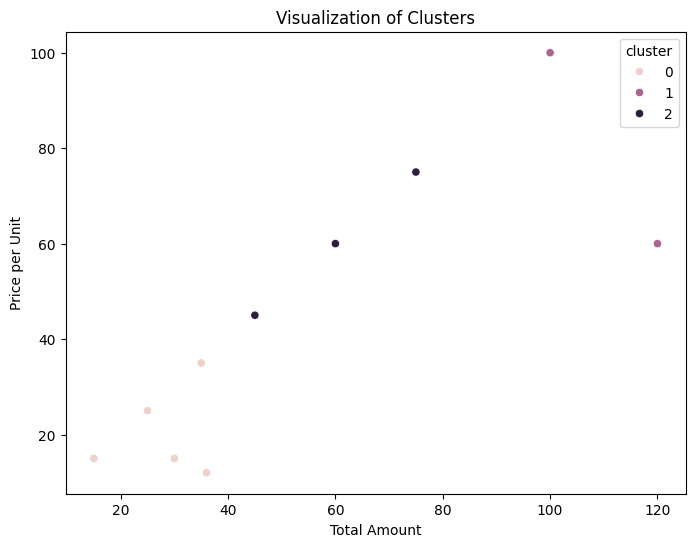

In [50]:
# Visualize the clusters using a scatter plot
# You might need to replace 'total_amount' and 'price_per_unit' with relevant columns for your clustering analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_amount', y='price_per_unit', hue='cluster', data=df2)
plt.title('Visualization of Clusters')
plt.xlabel('Total Amount')
plt.ylabel('Price per Unit')
plt.show()

**detecting anomalies**

In [51]:
# Import necessary libraries
from sklearn.ensemble import IsolationForest

# Assuming 'df2' is your DataFrame

# Select relevant features for anomaly detection
# (e.g., total_amount, quantity, price_per_unit)
features = ['total_amount', 'quantity', 'price_per_unit']
X = df2[features]

# Create and train an Isolation Forest model
model = IsolationForest(contamination=0.1)  # Adjust contamination as needed
model.fit(X)

# Predict anomaly scores
df2['anomaly_score'] = model.decision_function(X)

# Label anomalies (e.g., scores below a threshold)
df2['anomaly'] = model.predict(X)

# Anomalies are labeled as -1, normal as 1
# You can filter the DataFrame to see the anomalies:
anomalies = df2[df2['anomaly'] == -1]

# Print or analyze the anomalies
print(anomalies)

   transaction_id  store_id product_id product_name  quantity  price_per_unit  \
7         10008.0       1.0       P103     Sneakers       2.0            60.0   

   total_amount payment_method  transaction_date customer_id  cluster  \
7         120.0           Cash  12/10/2024 11:00        C108        1   

   anomaly_score  anomaly  
7      -0.007603       -1  


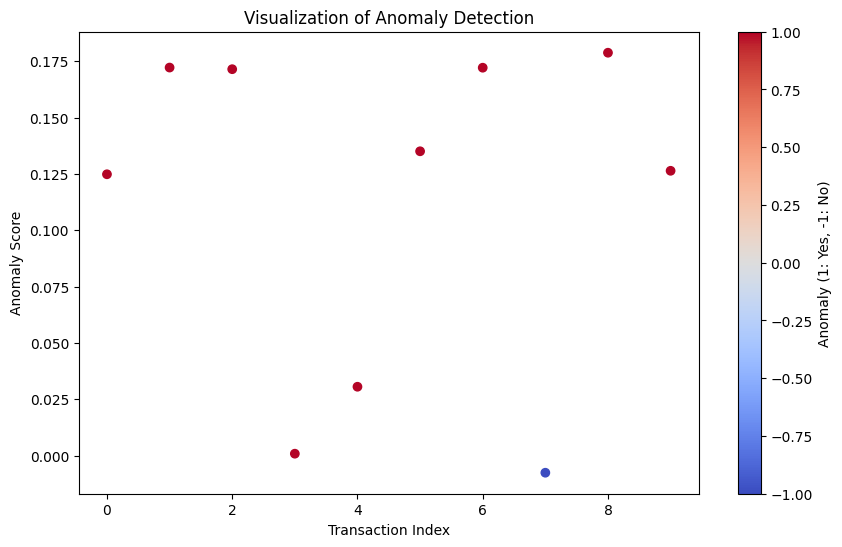

In [52]:

# Create a scatter plot to visualize anomaly scores
plt.figure(figsize=(10, 6))
plt.scatter(df2.index, df2['anomaly_score'], c=df2['anomaly'], cmap='coolwarm')
plt.xlabel('Transaction Index')
plt.ylabel('Anomaly Score')
plt.title('Visualization of Anomaly Detection')
plt.colorbar(label='Anomaly (1: Yes, -1: No)')
plt.show()